In [18]:
import numpy as np
import xarray as xr

import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt

import altair as alt
alt.data_transformers.enable('json')

from sublimpy import utils
from sublimpy import tidy
from sublimpy import extrautils
import glob

In [19]:
file_list = glob.glob("/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/*.nc")
file_list = [ f for f in file_list if '_20230418_' in f or '_20230419_' in f]
file_list = sorted(file_list)
file_list = file_list[6: 6 + 24]
file_list

['/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_06.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_07.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_08.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_09.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_10.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_11.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_12.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_13.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20230418_14.nc',
 '/Users/elischwat/

In [20]:
ds = xr.open_mfdataset(file_list, concat_dim="time", combine="nested")

In [21]:
ds = ds[[
    'base_time',
    
    'diagbits_10m_c',	'irgadiag_10m_c',	'ldiag_10m_c',
    'diagbits_10m_d',	'irgadiag_10m_d',	'ldiag_10m_d',
    'diagbits_10m_ue',	'irgadiag_10m_ue',	'ldiag_10m_ue',
    'diagbits_10m_uw',	'irgadiag_10m_uw',	'ldiag_10m_uw',
    'diagbits_15m_c',	'irgadiag_15m_c',	'ldiag_15m_c',
    # 'diagbits_1m_c',	'irgadiag_1m_c',	'ldiag_1m_c',
    # 'diagbits_1m_d',	'irgadiag_1m_d',	'ldiag_1m_d',
    # 'diagbits_1m_ue',	'irgadiag_1m_ue',	'ldiag_1m_ue',
    # 'diagbits_1m_uw',	'irgadiag_1m_uw',	'ldiag_1m_uw',
    'diagbits_20m_c',	'irgadiag_20m_c',	'ldiag_20m_c',
    'diagbits_2m_c',	'irgadiag_2m_c',	'ldiag_2m_c',
    'diagbits_3m_c',	'irgadiag_3m_c',	'ldiag_3m_c',
    'diagbits_3m_d',	'irgadiag_3m_d',	'ldiag_3m_d',
    'diagbits_3m_ue',	'irgadiag_3m_ue',	'ldiag_3m_ue',
    'diagbits_3m_uw',	'irgadiag_3m_uw',	'ldiag_3m_uw',
    'diagbits_5m_c',	'irgadiag_5m_c',	'ldiag_5m_c',

    # 'u_1m_c',	'v_1m_c',	'w_1m_c',	'h2o_1m_c',		'tc_1m_c',
    # 'u_1m_d',	'v_1m_d',	'w_1m_d',	'h2o_1m_d',		'tc_1m_d',
    # 'u_1m_ue',	'v_1m_ue',	'w_1m_ue',	'h2o_1m_ue',	'tc_1m_ue',
    # 'u_1m_uw',	'v_1m_uw',	'w_1m_uw',	'h2o_1m_uw',	'tc_1m_uw',
    'u_2m_c',	'v_2m_c',	'w_2m_c',	'h2o_2m_c',		'tc_2m_c',
    'u_3m_c',	'v_3m_c',	'w_3m_c',	'h2o_3m_c',		'tc_3m_c',
    'u_3m_d',	'v_3m_d',	'w_3m_d',	'h2o_3m_d',		'tc_3m_d',
    'u_3m_ue',	'v_3m_ue',	'w_3m_ue',	'h2o_3m_ue',	'tc_3m_ue',
    'u_3m_uw',	'v_3m_uw',	'w_3m_uw',	'h2o_3m_uw',	'tc_3m_uw',
    'u_5m_c',	'v_5m_c',	'w_5m_c',	'h2o_5m_c',		'tc_5m_c',
    'u_10m_c',	'v_10m_c',	'w_10m_c',	'h2o_10m_c',	'tc_10m_c',
    'u_10m_d',	'v_10m_d',	'w_10m_d',	'h2o_10m_d',	'tc_10m_d',
    'u_10m_ue',	'v_10m_ue',	'w_10m_ue',	'h2o_10m_ue',	'tc_10m_ue',
    'u_10m_uw',	'v_10m_uw',	'w_10m_uw',	'h2o_10m_uw',	'tc_10m_uw',
    'u_15m_c',	'v_15m_c',	'w_15m_c',	'h2o_15m_c',	'tc_15m_c',
    'u_20m_c',	'v_20m_c',	'w_20m_c',	'h2o_20m_c',	'tc_20m_c',
]]

# Create timestamp
To use the datam, its necessary to combine 3 columns of data from the dataset to get the full timestamp. This is demonstrated below. The 'time' column actually only incudes the second and minute information. For all datapoints, the hour according to the 'time' column is 1.  The 'base_time' column indicates the hour of the day. The 'sample' column indicates the 20hz sample number. 

We demonstrate this in the plots below

In [22]:
df1 = pd.DataFrame({'time': np.unique(ds['time'])})
df2 = pd.DataFrame({'base_time': np.unique(ds['base_time'])})
df3 = pd.DataFrame({'sample': np.unique(ds['sample'])})
(
    alt.Chart(df3).mark_tick(thickness=5).encode(
        alt.X("sample:Q").title(
            f'sample (n = {len(df3)})'
        )
    ).properties(width=600) & 

    alt.Chart(df1).mark_tick(thickness=1).encode(
        alt.X("time:T").axis(
            format='%H%M%p'
        ).title(
            f'time (n = {len(df1)})'
        )
    ).properties(width=600) & 

    alt.Chart(df2).mark_tick(thickness=5).encode(
        alt.X("base_time:T").title(
            f'base_time (n = {len(df2)})'
        )
    ).properties(width=600)
)

alt.VConcatChart(...)

In [23]:
df = ds.to_dataframe().reset_index()

In [24]:
import swifter

In [25]:
df['time'] = df.swifter.apply(lambda row: dt.datetime(
        year = row['time'].year,
        month = row['time'].month,
        day = row['time'].day,
        hour = row['base_time'].hour,
        minute = row['time'].minute,
        second = row['time'].second,
        microsecond = int(row['sample'] * (1e6/20))
    ),
    axis = 1
)

Dask Apply:   0%|          | 0/23 [00:00<?, ?it/s]

In [26]:
df = utils.modify_df_timezone(df, 'UTC', "US/Mountain")
ds = df.set_index('time').to_xarray()

# Calculate temporal autocorrelation!

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf

In [29]:
df['spd_3m_c'] = np.sqrt(df['u_3m_c']**2 + df['v_3m_c']**2 + df['w_3m_c']**2)
df['spd_5m_c'] = np.sqrt(df['u_5m_c']**2 + df['v_5m_c']**2 + df['w_5m_c']**2)
df['spd_10m_c'] = np.sqrt(df['u_10m_c']**2 + df['v_10m_c']**2 + df['w_10m_c']**2)
df['spd_20m_c'] = np.sqrt(df['u_20m_c']**2 + df['v_20m_c']**2 + df['w_20m_c']**2)

In [40]:
def plot_ccf_with_params(time1, time2, ax, title):
    plot_ccf(
        df.set_index('time')['spd_10m_c'].loc[time1: time2].ffill().values,
        df.set_index('time')['spd_20m_c'].loc[time1: time2].ffill().values,
        lags=np.linspace(0,2400, 50),
        ax = ax,
        title = title,
        label = '20m lags 10m',
        use_vlines=False,
        markersize = 2
    )
    plot_ccf(
        df.set_index('time')['spd_20m_c'].loc[time1: time2].ffill().values,
        df.set_index('time')['spd_10m_c'].loc[time1: time2].ffill().values,
        lags=np.linspace(0,2400, 50),
        ax = ax,
        title = title,
        label = '10m lags 20m',
        use_vlines=False,
        markersize = 2
    )

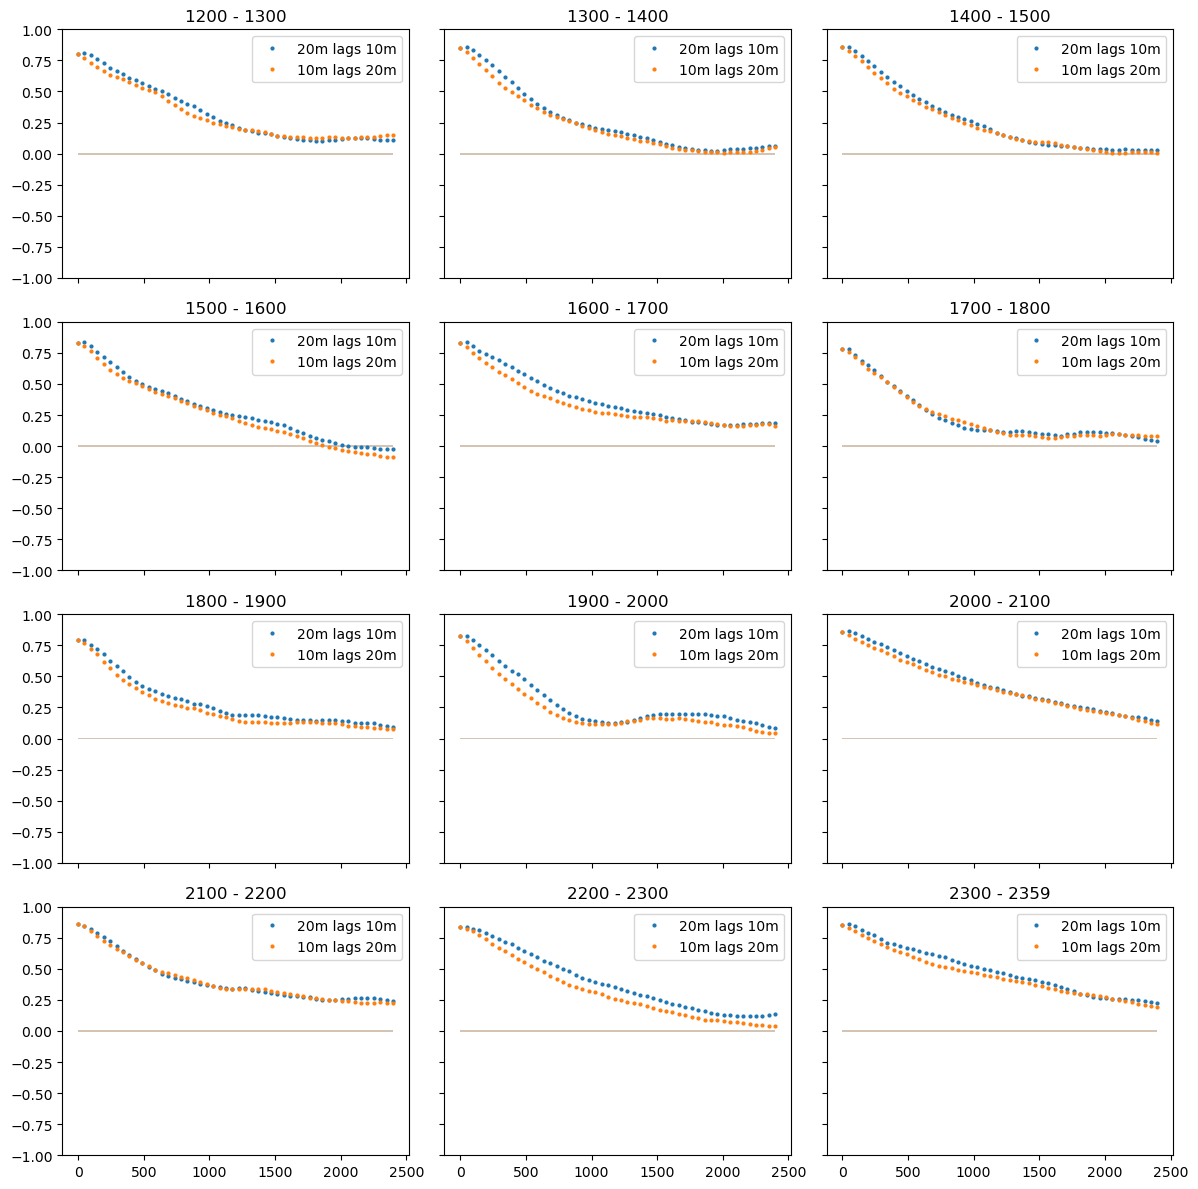

In [44]:
fig, axes = plt.subplots(4,3, figsize=(12, 12), sharex=True, sharey=True)
plot_ccf_with_params('20230418 1200', '20230418 1300', axes[0, 0], '1200 - 1300')
plot_ccf_with_params('20230418 1300', '20230418 1400', axes[0, 1], '1300 - 1400')
plot_ccf_with_params('20230418 1400', '20230418 1500', axes[0, 2], '1400 - 1500')

plot_ccf_with_params('20230418 1500', '20230418 1600', axes[1, 0], '1500 - 1600')
plot_ccf_with_params('20230418 1600', '20230418 1700', axes[1, 1], '1600 - 1700')
plot_ccf_with_params('20230418 1700', '20230418 1800', axes[1, 2], '1700 - 1800')

plot_ccf_with_params('20230418 1800', '20230418 1900', axes[2, 0], '1800 - 1900')
plot_ccf_with_params('20230418 1900', '20230418 2000', axes[2, 1], '1900 - 2000')
plot_ccf_with_params('20230418 2000', '20230418 2100', axes[2, 2], '2000 - 2100')

plot_ccf_with_params('20230418 2100', '20230418 2200', axes[3, 0], '2100 - 2200')
plot_ccf_with_params('20230418 2200', '20230418 2300', axes[3, 1], '2200 - 2300')
plot_ccf_with_params('20230418 2300', '20230418 2359', axes[3, 2], '2300 - 2359')

for ax in axes.flatten():
    ax.legend()
plt.tight_layout()
plt.show()
